## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [171]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [172]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('Resources/bitstamp.csv'),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [173]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


In [174]:
bitstamp.shape

(129540, 7)

### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [175]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('Resources/coinbase.csv'),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)

In [176]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


In [177]:
coinbase.shape

(129540, 7)

## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [178]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.isnull().sum()  # same as .isna().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [179]:
bitstamp.dropna(inplace = True)
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [180]:
bitstamp.shape

(129067, 7)

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [181]:
# Use the str.replace function to remove the dollar sign, $
bitstamp['Close'] = bitstamp['Close'].str.replace("$","", regex=False)

In [182]:
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [183]:
# Convert the Close data type to a float
bitstamp['Close'] = bitstamp['Close'].astype("float")

In [184]:
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [185]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

In [186]:
# No duplicates 

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [187]:
# Repeat Steps 1–4 for the coinbase DataFrame
# 1
coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [188]:
#2
coinbase['Close'] = coinbase['Close'].str.replace("$","", regex=False)

In [189]:
#3
coinbase['Close'] = coinbase['Close'].astype("float")
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [190]:
#4
coinbase.duplicated().sum()

217

In [191]:
#4 to drop the buplicate
coinbase.drop_duplicates(inplace = True)
#check there is no duplicate
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [192]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = pd.DataFrame(bitstamp.loc[:, "Close"])

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [193]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
#coinbase_sliced = # YOUR CODE HERE
coinbase_sliced = pd.DataFrame(coinbase.loc[:, "Close"])

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [194]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [195]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

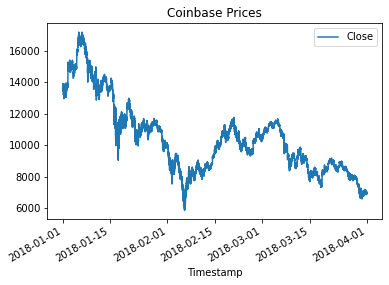

In [196]:
coinbase_sliced.plot(title = 'Coinbase Prices')

In [197]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# 

<AxesSubplot:title={'center':'Bitstamp Price'}, xlabel='Timestamp'>

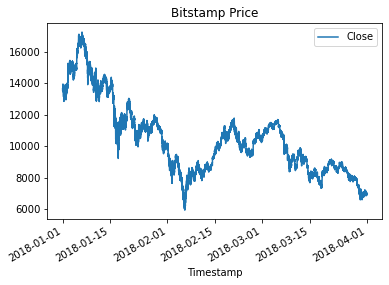

In [198]:
bitstamp_sliced.plot(title = 'Bitstamp Price')

In [199]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

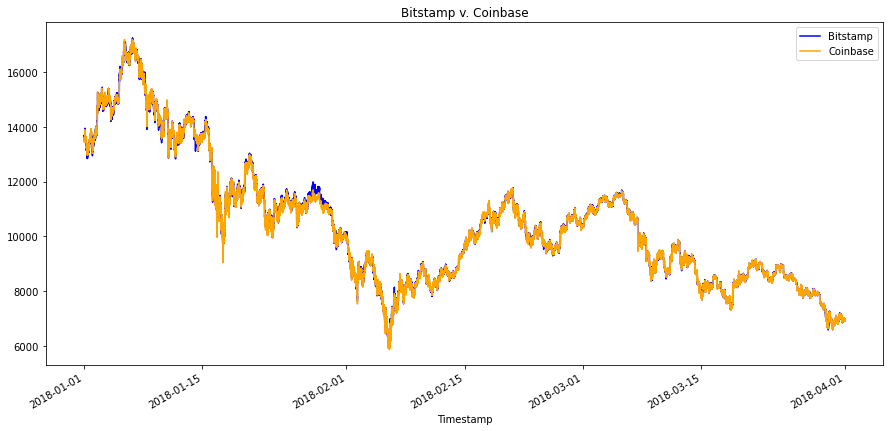

In [200]:
bitstamp_sliced['Close'].plot(legend=True, figsize=(15, 7), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

In [201]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

<AxesSubplot:title={'center':'Exchange Comparison for earlier period'}, xlabel='Timestamp'>

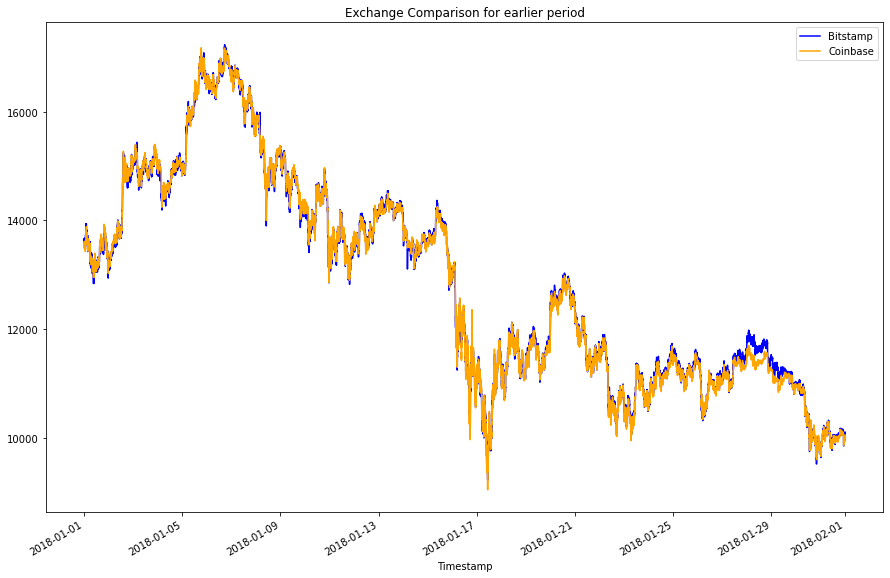

In [202]:
bitstamp_sliced['Close'].loc['2018-01-01' : '2018-01-31'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison for earlier period", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-01-01' : '2018-01-31'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [203]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

<AxesSubplot:title={'center':'Exchange Comparison for later period'}, xlabel='Timestamp'>

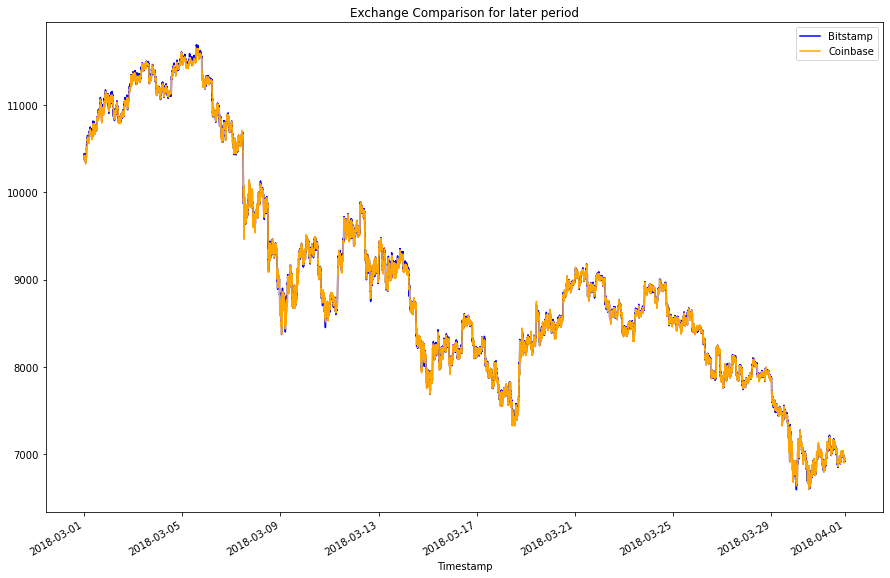

In [204]:
bitstamp_sliced['Close'].loc['2018-03-01' : '2018-03-31'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison for later period", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-03-01' : '2018-03-31'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Exchange Comparison for Feb period'}, xlabel='Timestamp'>

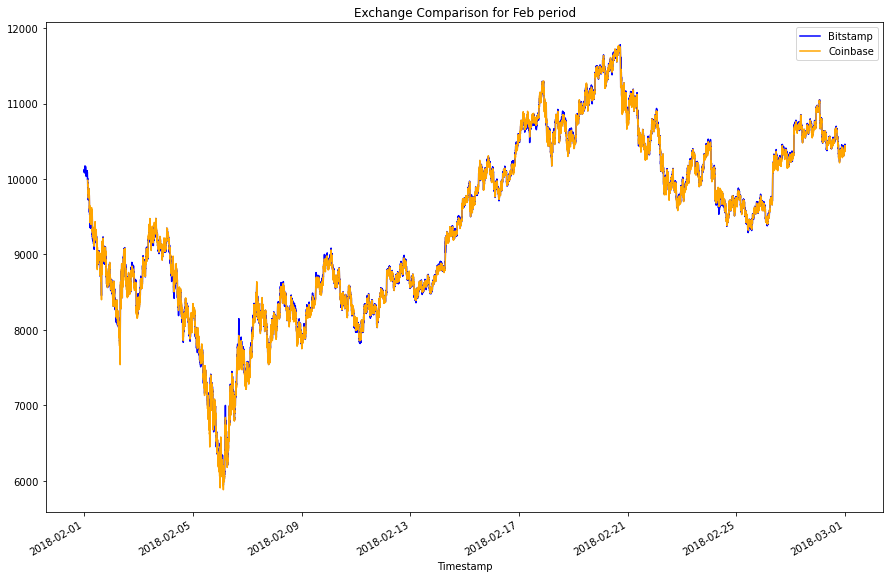

In [205]:
# Feb data
bitstamp_sliced['Close'].loc['2018-02-01' : '2018-02-28'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison for Feb period", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-02-01' : '2018-02-28'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [206]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Exchange Comparison for Jan, 29'}, xlabel='Timestamp'>

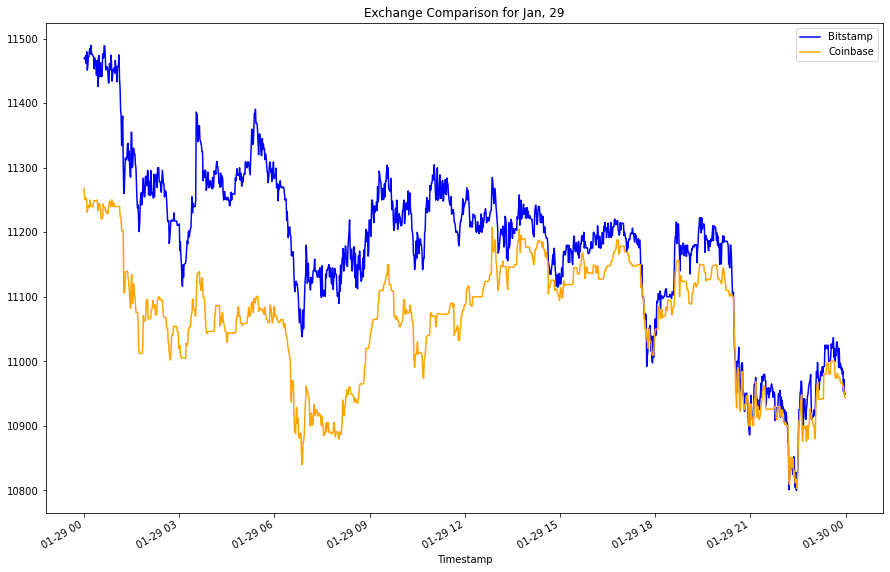

In [207]:
bitstamp_sliced['Close'].loc['2018-01-29' : '2018-01-29'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison for Jan, 29", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-01-29' : '2018-01-29'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

# there seems a variation on Jan 29 on both assets and Feb 24



<AxesSubplot:title={'center':'Exchange Comparison for Feb, 24'}, xlabel='Timestamp'>

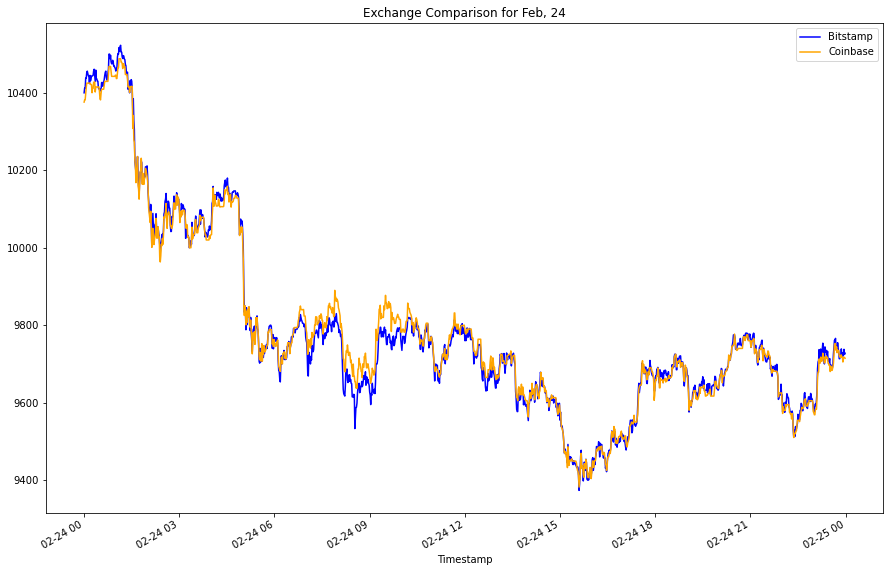

In [208]:
# Feb 24 

bitstamp_sliced['Close'].loc['2018-02-24' : '2018-02-24'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison for Feb, 24", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-02-24' : '2018-02-24'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [209]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE

<AxesSubplot:title={'center':'Exchange Comparison for March, 31'}, xlabel='Timestamp'>

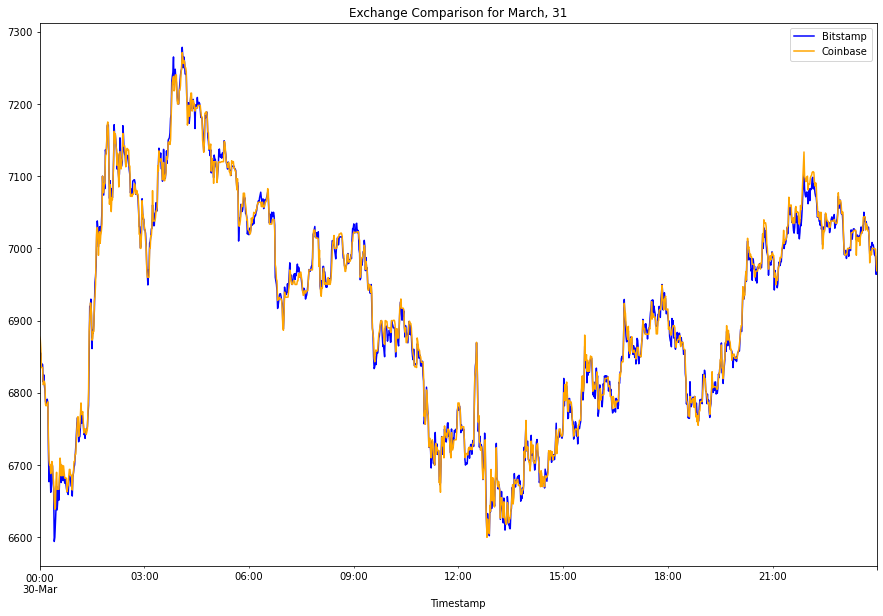

In [210]:
# March 31

bitstamp_sliced['Close'].loc['2018-03-30' : '2018-03-30'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison for March, 31", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-03-30' : '2018-03-30'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [211]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = pd.DataFrame(coinbase_sliced['Close'].loc['2018-01-29' : '2018-01-29'] -
bitstamp_sliced['Close'].loc['2018-01-29' : '2018-01-29'])
    

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

,Close
count,1430.000000
mean,-120.214510
std,85.164846
min,-300.270000
25%,-203.237500
50%,-132.420000
75%,-37.002500
max,48.010000


<AxesSubplot:>

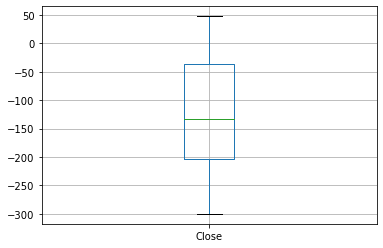

In [212]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.boxplot()

<AxesSubplot:title={'center':'Exchange Comparison for Feb, 24th 2018'}, xlabel='Timestamp'>

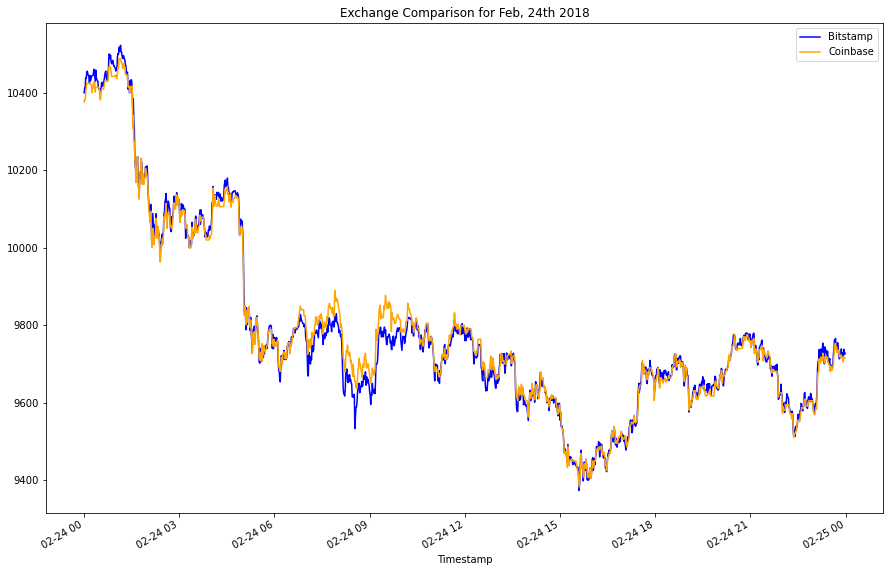

In [213]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018-02-24' : '2018-02-24'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison for Feb, 24th 2018", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-02-24' : '2018-02-24'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

In [214]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = pd.DataFrame(coinbase_sliced['Close'].loc['2018-02-24' : '2018-02-24'] -
bitstamp_sliced['Close'].loc['2018-02-24' : '2018-02-24'])

# Generate summary statistics 
arbitrage_spread_middle.describe()

,Close
count,1437.000000
mean,3.396131
std,22.969472
min,-50.180000
25%,-10.590000
50%,-0.010000
75%,12.120000
max,121.320000


<AxesSubplot:>

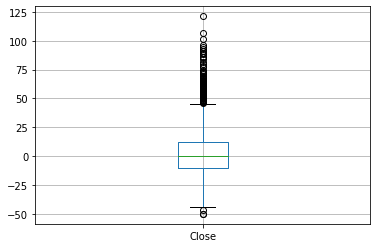

In [215]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.boxplot()

In [216]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE

In [217]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = pd.DataFrame(coinbase_sliced['Close'].loc['2018-03-30' : '2018-03-30'] -
bitstamp_sliced['Close'].loc['2018-03-30' : '2018-03-30'])

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

,Close
count,1440.000000
mean,1.419507
std,8.918465
min,-30.000000
25%,-4.412500
50%,1.205000
75%,6.640000
max,56.920000


<AxesSubplot:>

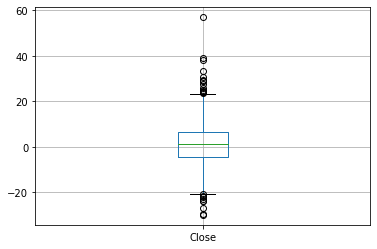

In [218]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.boxplot()

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [219]:
be  = bitstamp_sliced['Close'].loc['2018-01-29' : '2018-01-29']
be.isnull().sum()
be.shape

(1430,)

In [220]:
ce  = coinbase_sliced['Close'].loc['2018-01-29' : '2018-01-29']
ce.isnull().sum()
ce.shape

(1440,)

In [221]:
arbitrage_spread_early.shape

(1440, 1)

In [222]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = pd.DataFrame(bitstamp_sliced['Close'].loc['2018-01-29' : '2018-01-29'] -
coinbase_sliced['Close'].loc['2018-01-29' : '2018-01-29'])

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
condition = arbitrage_spread_early['Close']>0
positive_early = arbitrage_spread_early[condition]
positive_early.describe()

# bitstmap was higher than coinbase 

,Close
count,1379.000000
mean,124.976425
std,82.959829
min,0.570000
25%,41.885000
50%,144.380000
75%,204.135000
max,300.270000


In [223]:
arbitrage_spread_early.shape

(1440, 1)

In [224]:
# for februray 24th bitstamp was mostly highter than coinbase

arbitrage_spread_middle = pd.DataFrame(bitstamp_sliced['Close'].loc['2018-02-24' : '2018-02-24'] -
coinbase_sliced['Close'].loc['2018-02-24' : '2018-02-24'])

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
condition = arbitrage_spread_middle['Close']>0
positive_middle = arbitrage_spread_middle[condition]
positive_middle.describe()

,Close
count,719.000000
mean,12.926912
std,9.672629
min,0.010000
25%,5.335000
50%,10.590000
75%,18.245000
max,50.180000


In [225]:
# for late period , March 30.

arbitrage_spread_late = pd.DataFrame(coinbase_sliced['Close'].loc['2018-03-30' : '2018-03-30'] -
bitstamp_sliced['Close'].loc['2018-03-30' : '2018-03-30'])

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
condition = arbitrage_spread_late['Close']>0
positive_late = arbitrage_spread_late[condition]
positive_late.describe()
# coinsebase is trading higher than the bitstamp 

,Close
count,797.000000
mean,7.538846
std,6.265063
min,0.010000
25%,2.780000
50%,6.060000
75%,10.570000
max,56.920000


In [226]:
positive_early.index.shape



(1379,)

In [227]:
coinbase_early.loc[positive_early.index,:]

,Close
Timestamp,
2018-01-29 00:00:00,11268.01
2018-01-29 00:01:00,11252.99
2018-01-29 00:02:00,11250.77
2018-01-29 00:03:00,11250.77
2018-01-29 00:04:00,11252.99
...,...
2018-01-29 23:54:00,10966.50
2018-01-29 23:55:00,10961.37
2018-01-29 23:57:00,10953.52


In [228]:
positive_middle.index.shape

(719,)

In [229]:
coinbase_middle.loc[positive_middle.index,:]

,Close
Timestamp,
2018-02-24 00:00:00,10376.00
2018-02-24 00:01:00,10381.91
2018-02-24 00:02:00,10382.00
2018-02-24 00:03:00,10398.29
2018-02-24 00:04:00,10413.03
...,...
2018-02-24 23:55:00,9705.00
2018-02-24 23:56:00,9717.01
2018-02-24 23:57:00,9717.01


In [230]:
positive_late.index.shape

(797,)

In [231]:
coinbase_late.loc[positive_late.index,:]

,Close
Timestamp,
2018-03-30 00:00:00,6877.35
2018-03-30 00:01:00,6874.01
2018-03-30 00:02:00,6860.01
2018-03-30 00:08:00,6816.05
2018-03-30 00:09:00,6812.24
...,...
2018-03-30 23:46:00,7015.60
2018-03-30 23:55:00,6999.99
2018-03-30 23:56:00,6999.01


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [232]:
arbitrage_spread_early.isnull().sum()

Close    10
dtype: int64

In [233]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
coinbase_early =  pd.DataFrame(coinbase_sliced['Close'].loc['2018-01-29' : '2018-01-29'], columns=['Close'])
coinbase_early_positive = coinbase_early.loc[positive_early.index,:]
spread_return_early= arbitrage_spread_early / coinbase_early_positive

# Review the spread return DataFrame
spread_return_early.dropna(inplace=True)
spread_return_early

,Close
Timestamp,
2018-01-29 00:00:00,0.017925
2018-01-29 00:01:00,0.019284
2018-01-29 00:02:00,0.019307
2018-01-29 00:03:00,0.019840
2018-01-29 00:04:00,0.018541
...,...
2018-01-29 23:54:00,0.001231
2018-01-29 23:55:00,0.002155
2018-01-29 23:57:00,0.001672


In [234]:
### change all eary to middel
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
coinbase_early =  pd.DataFrame(coinbase_sliced['Close'].loc['2018-01-29' : '2018-01-29'], columns=['Close'])
coinbase_early_positive = coinbase_early.loc[positive_early.index,:]
spread_return_early= arbitrage_spread_early / coinbase_early_positive

# Review the spread return DataFrame
spread_return_early.dropna(inplace=True)
spread_return_early

,Close
Timestamp,
2018-01-29 00:00:00,0.017925
2018-01-29 00:01:00,0.019284
2018-01-29 00:02:00,0.019307
2018-01-29 00:03:00,0.019840
2018-01-29 00:04:00,0.018541
...,...
2018-01-29 23:54:00,0.001231
2018-01-29 23:55:00,0.002155
2018-01-29 23:57:00,0.001672


In [235]:
# early dataset 

# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
coinbase_early =  pd.DataFrame(coinbase_sliced['Close'].loc['2018-01-29' : '2018-01-29'], columns=['Close'])
coinbase_early_positive = coinbase_early.loc[positive_early.index,:]
spread_return_early= arbitrage_spread_early / coinbase_early_positive

# Review the spread return DataFrame
spread_return_early.dropna(inplace=True)
spread_return_early

,Close
Timestamp,
2018-01-29 00:00:00,0.017925
2018-01-29 00:01:00,0.019284
2018-01-29 00:02:00,0.019307
2018-01-29 00:03:00,0.019840
2018-01-29 00:04:00,0.018541
...,...
2018-01-29 23:54:00,0.001231
2018-01-29 23:55:00,0.002155
2018-01-29 23:57:00,0.001672


In [236]:
# For  middle date dataset
coinbase_middle =  pd.DataFrame(coinbase_sliced['Close'].loc['2018-02-24' : '2018-02-24'], columns=['Close'])
coinbase_middle_positive = coinbase_middle.loc[positive_middle.index,:]
spread_return_middle= arbitrage_spread_middle / coinbase_middle_positive

# Review the spread return DataFrame
spread_return_middle.dropna(inplace=True)
spread_return_middle

,Close
Timestamp,
2018-02-24 00:00:00,0.002313
2018-02-24 00:01:00,0.002897
2018-02-24 00:02:00,0.002851
2018-02-24 00:03:00,0.003819
2018-02-24 00:04:00,0.002383
...,...
2018-02-24 23:55:00,0.001546
2018-02-24 23:56:00,0.000717
2018-02-24 23:57:00,0.002129


In [237]:
# for the late dataset
coinbase_late =  pd.DataFrame(coinbase_sliced['Close'].loc['2018-03-30' : '2018-03-30'], columns=['Close'])
coinbase_late_positive = coinbase_late.loc[positive_late.index,:]
spread_return_late= arbitrage_spread_late / coinbase_late_positive

# Review the spread return DataFrame
spread_return_late.dropna(inplace=True)
spread_return_late

,Close
Timestamp,
2018-03-30 00:00:00,0.002523
2018-03-30 00:01:00,0.002630
2018-03-30 00:02:00,0.000792
2018-03-30 00:08:00,0.000713
2018-03-30 00:09:00,0.001277
...,...
2018-03-30 23:46:00,0.000576
2018-03-30 23:55:00,0.001189
2018-03-30 23:56:00,0.001287


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [238]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early['Close']>0.01]

# Review the first five profitable trades
profitable_trades_early.head()

,Close
Timestamp,
2018-01-29 00:00:00,0.017925
2018-01-29 00:01:00,0.019284
2018-01-29 00:02:00,0.019307
2018-01-29 00:03:00,0.019840
2018-01-29 00:04:00,0.018541


In [239]:
# for  middle data set
profitable_trades_middle = spread_return_middle[spread_return_middle['Close']>0.01]
profitable_trades_middle.head()

,Close
Timestamp,


In [251]:
# for late dataset
profitable_trades_late = spread_return_late[spread_return_late['Close']>0.01]
profitable_trades_late.head()


,Close
Timestamp,


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [241]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

,Close
count,742.000000
mean,0.017795
std,0.003142
min,0.010021
25%,0.015371
50%,0.018233
75%,0.020063
max,0.027075


In [252]:
# for the middle dataset
profitable_trades_middle.describe()

,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [243]:
# for late dataset
profitable_trades_late.describe()

,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [244]:
# ANSWER:  which of the 3 has larger mean out of the three dates

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [245]:
profitable_trades_early.head()

,Close
Timestamp,
2018-01-29 00:00:00,0.017925
2018-01-29 00:01:00,0.019284
2018-01-29 00:02:00,0.019307
2018-01-29 00:03:00,0.019840
2018-01-29 00:04:00,0.018541


In [246]:
bitstamp_sliced['Close'].loc['2018-01-29'].head()

Timestamp
2018-01-29 00:00:00    11469.99
2018-01-29 00:01:00    11469.99
2018-01-29 00:02:00    11467.99
2018-01-29 00:03:00    11473.99
2018-01-29 00:04:00    11461.63
Name: Close, dtype: float64

In [247]:
profit_early = profitable_trades_early * pd.DataFrame(bitstamp_sliced['Close'].loc['2018-01-29'])
profit_early = profit_early.dropna()
profit_early

,Close
Timestamp,
2018-01-29 00:00:00,205.600508
2018-01-29 00:01:00,221.184577
2018-01-29 00:02:00,221.413893
2018-01-29 00:03:00,227.648779
2018-01-29 00:04:00,212.508363
...,...
2018-01-29 12:24:00,117.763564
2018-01-29 12:31:00,129.926193
2018-01-29 12:33:00,123.269349


In [248]:
# profitbale_trades_middle 
profitable_trades_middle.head()

,Close
Timestamp,


In [249]:
# profitbale_trades_late 

In [256]:
profitable_trades_late.head()

,Close
Timestamp,


In [250]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = # YOUR CODE HERE

# Drop any missing values from the profit DataFrame
profit_per_trade_early = # YOUR CODE HERE

# View the early profit DataFrame
# YOUR CODE HERE

SyntaxError: invalid syntax (<ipython-input-250-276f20b4d17b>, line 3)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [ ]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_early.describe()

In [ ]:
profit_early.plot()

In [ ]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [253]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_early.sum()

Close    148647.302574
dtype: float64

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [254]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_early.cumsum()
cumulative_profit_early

,Close
Timestamp,
2018-01-29 00:00:00,205.600508
2018-01-29 00:01:00,426.785085
2018-01-29 00:02:00,648.198978
2018-01-29 00:03:00,875.847756
2018-01-29 00:04:00,1088.356119
...,...
2018-01-29 12:24:00,148167.677697
2018-01-29 12:31:00,148297.603890
2018-01-29 12:33:00,148420.873240


<AxesSubplot:xlabel='Timestamp'>

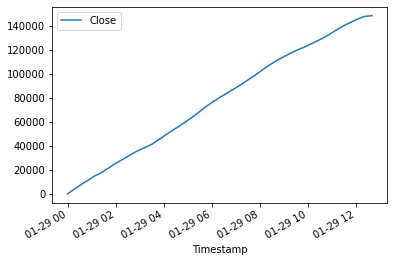

In [255]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot()

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE